In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\91702\Python pro\Zomato_Analysis\zomato.csv')

df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#Clean and Prepare the Data

# Check column names
print("Columns in the dataset:")
print(df.columns.tolist())

# Standardize column names 
df.columns = df.columns.str.strip()

# Recheck the standardized columns
print("\nStandardized column names:")
print(df.columns.tolist())

# Drop rows with missing values in key columns 
required_columns = ['City', 'Cuisines', 'Average Cost for two', 'Aggregate rating']
existing_required_columns = [col for col in required_columns if col in df.columns]

df = df.dropna(subset=existing_required_columns)

# Convert data types if the columns exist
if 'Average Cost for two' in df.columns:
    df['Average Cost for two'] = df['Average Cost for two'].astype(int)

if 'Aggregate rating' in df.columns:
    df['Aggregate rating'] = df['Aggregate rating'].astype(float)

#Display a quick summary
print("\nData cleaned and prepared successfully!")
print(df[existing_required_columns].head())

Columns in the dataset:
['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

Standardized column names:
['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

Data cleaned and prepared successfully!
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [53]:
print(df.columns.tolist())

['url', 'address', 'name', 'online_order', 'book_table', 'Aggregate rating', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'Cuisines', 'Average Cost for two', 'reviews_list', 'menu_item', 'listed_in(type)', 'City']


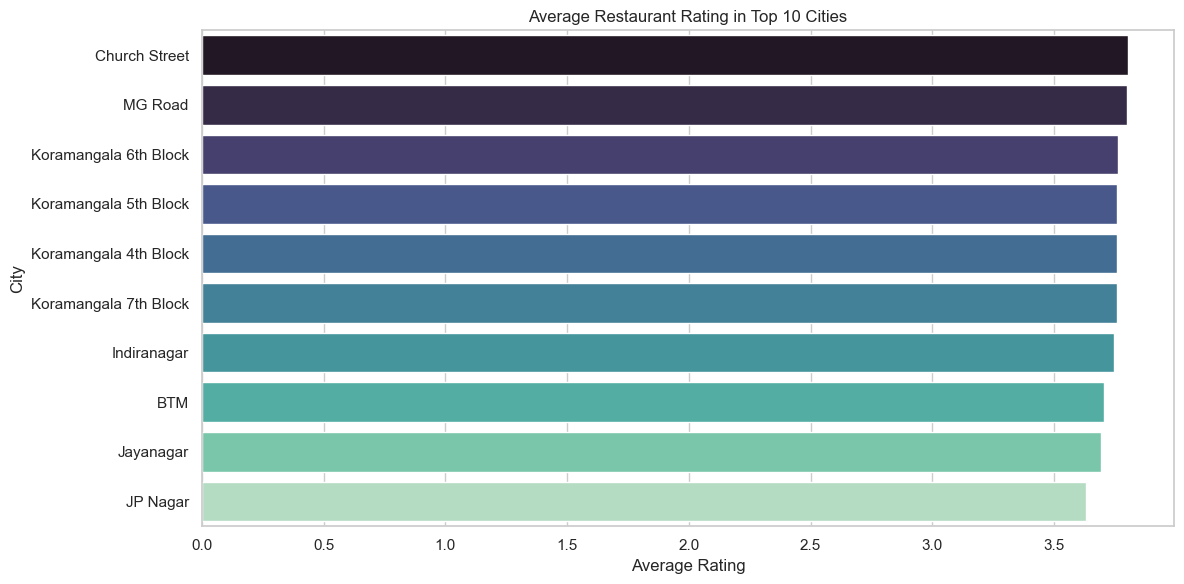

In [38]:
#Average Rating by City (Top 10 Cities)

# Convert Series to DataFrame
avg_rating_df = avg_rating_by_city.reset_index()
avg_rating_df.columns = ['City', 'Average Rating']

# Plot with hue assigned to 'City'
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating_df, x='Average Rating', y='City', hue='City', palette='mako', legend=False)
plt.title('Average Restaurant Rating in Top 10 Cities')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("Average_Rating_Top10_Cities.png")
plt.show()

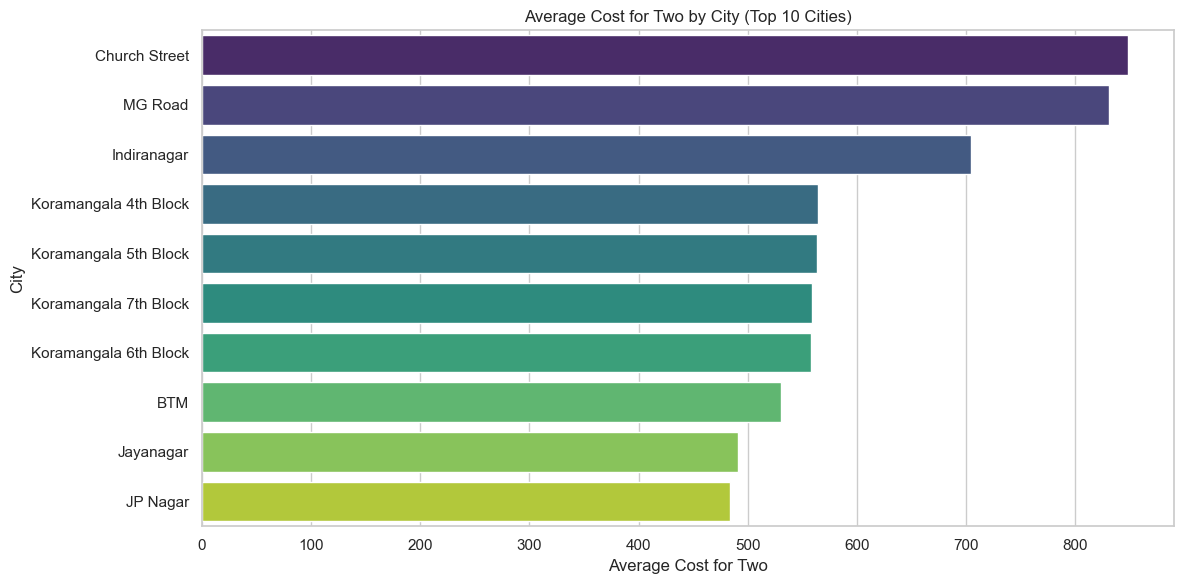

In [39]:
#Average Cost for Two by City (Top 10 Cities)

# Group by City and calculate average cost
top_cities_cost = df['City'].value_counts().head(10).index
avg_cost_by_city = df[df['City'].isin(top_cities_cost)].groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)

# Convert to DataFrame
avg_cost_df = avg_cost_by_city.reset_index()
avg_cost_df.columns = ['City', 'Average Cost for Two']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_cost_df, x='Average Cost for Two', y='City', hue='City', palette='viridis', legend=False)
plt.title('Average Cost for Two by City (Top 10 Cities)')
plt.xlabel('Average Cost for Two')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("Average_Cost_Top10_Cities.png")
plt.show()

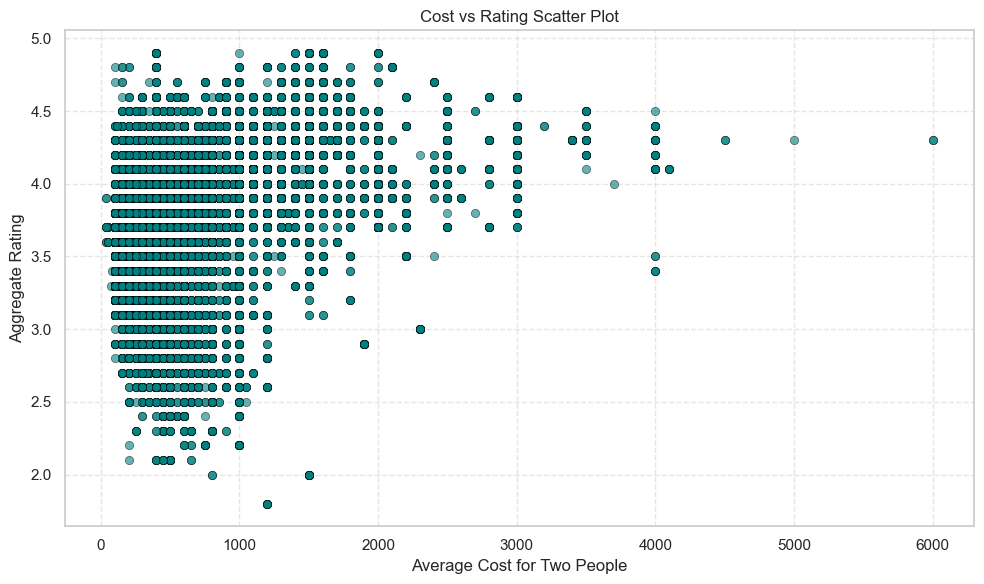

In [41]:
#Cost vs Rating Scatter Plot

# Check if necessary columns exist
if 'Average Cost for two' in df.columns and 'Aggregate rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating', alpha=0.6, color='teal', edgecolor='black')
    plt.title('Cost vs Rating Scatter Plot')
    plt.xlabel('Average Cost for Two People')
    plt.ylabel('Aggregate Rating')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("Cost_vs_Rating_Scatter.png")
    plt.show()
else:
    print("Required columns are missing in the dataset.")

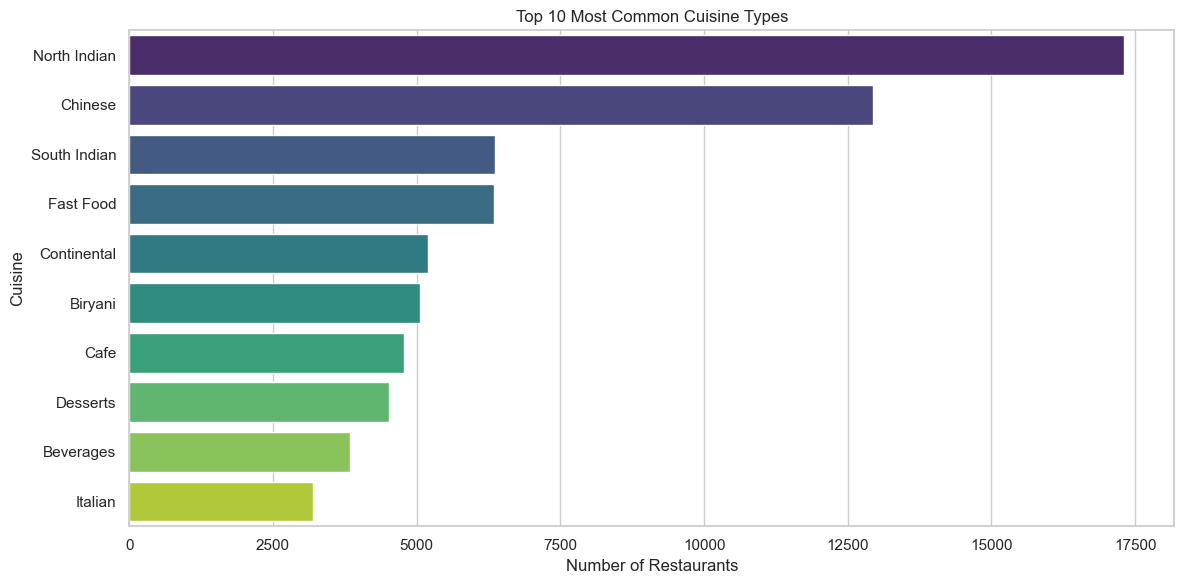

In [48]:
#Top 10 Most Common Cuisine Types 

cuisine_names = list(top_10_cuisines.keys())
cuisine_counts = list(top_10_cuisines.values())

plt.figure(figsize=(12,6))
sns.barplot(
    x=cuisine_counts,
    y=cuisine_names,
    hue=cuisine_names,  # Assign hue to match y-values
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Top 10 Most Common Cuisine Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig("Top_10_Cuisines.png")
plt.show()

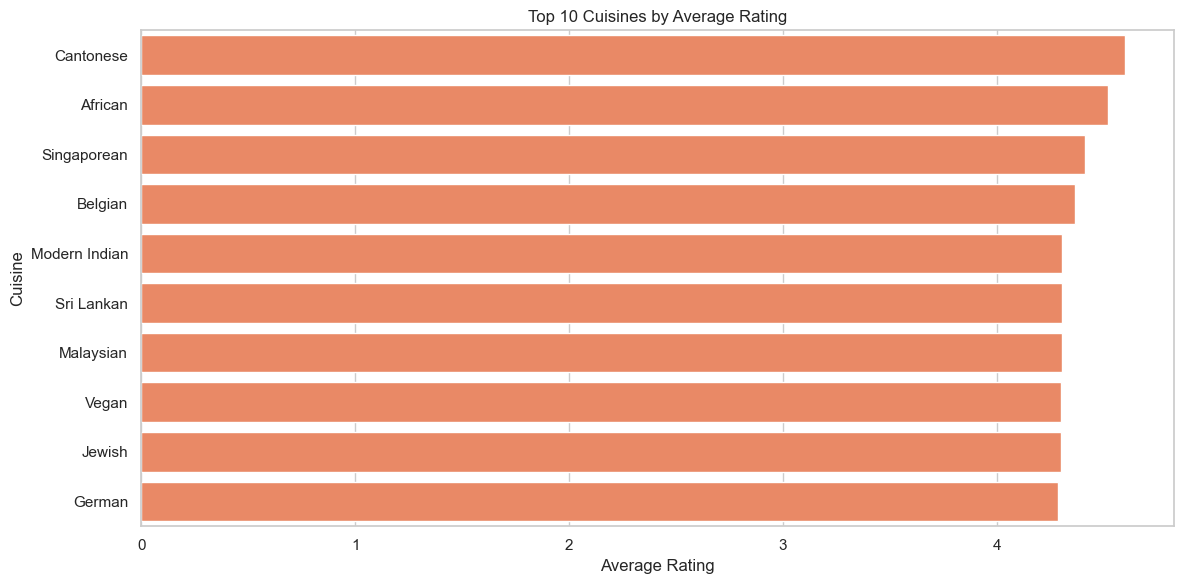

In [50]:
#Average Rating by Cuisine (Top 10 Most Rated Cuisines)
if 'Cuisines' in df.columns and 'Aggregate rating' in df.columns:
    cuisine_ratings = []
    for index, row in df.iterrows():
        if pd.notnull(row['Cuisines']):
            cuisines = [c.strip() for c in str(row['Cuisines']).split(',')]
            for cuisine in cuisines:
                cuisine_ratings.append((cuisine, row['Aggregate rating']))
    
    cuisine_rating_df = pd.DataFrame(cuisine_ratings, columns=['Cuisine', 'Rating'])
    avg_rating_by_cuisine = cuisine_rating_df.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index, color='coral')
    plt.title('Top 10 Cuisines by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Cuisine')
    plt.tight_layout()
    plt.savefig("Top_10_Cuisines_by_Rating.png")
    plt.show()